In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [3]:
Idata=pd.read_csv('C:/Users/xy752712929/Desktop/时间序列/construction_material_prices_2008_2018.csv')

In [4]:
Idata.describe()

,price_steel,price_rebar,price_glass,price_concrete,price_plywood
count,2309.000000,1649.000000,1472.000000,1447.000000,2673.000000
mean,12.611319,18.306339,29.997962,26.000636,12.775067
std,6.038862,8.587938,6.524622,7.314764,3.931698
min,3.062500,3.000000,16.000000,10.416667,5.000000
25%,8.500000,12.071429,25.000000,20.559028,10.125000
50%,10.500000,16.500000,29.000000,25.043478,12.125000
75%,14.833333,22.500000,35.000000,30.000000,14.333333
max,41.000000,55.000000,48.000000,50.000000,34.000000


In [5]:
Idata.rename( columns={'Unnamed: 0':'date_time'}, inplace=True )

In [6]:
Idata.describe()
steel = Idata[['date_time','price_steel']]
steel['date_time'] = pd.to_datetime(steel['date_time']) 

<ipython-input-6-dddb480f4c10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steel['date_time'] = pd.to_datetime(steel['date_time'])


# 时序图

Text(0.5, 1.0, '钢铁：时序图')

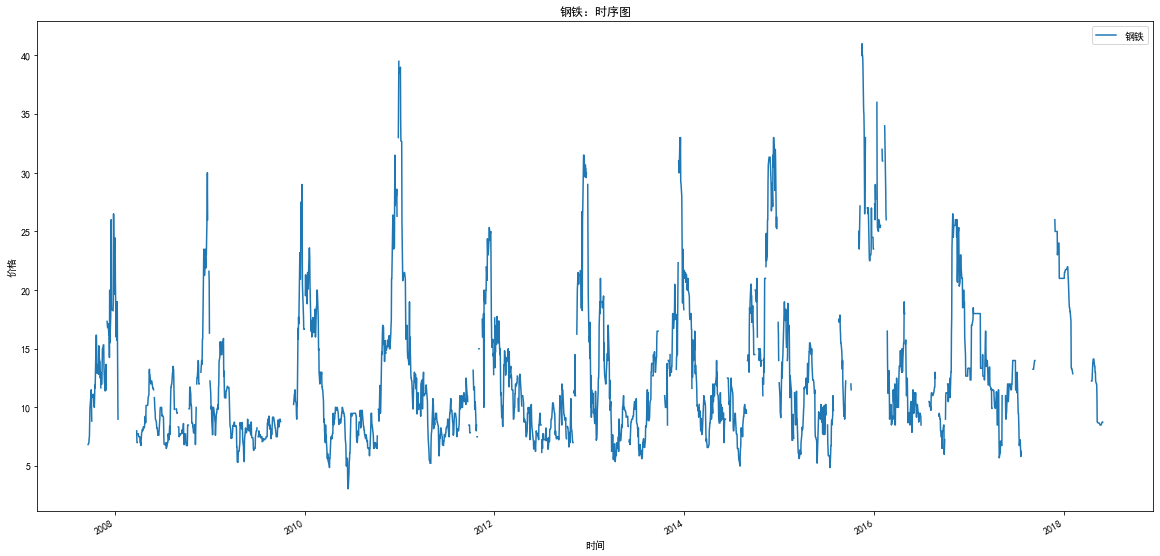

In [7]:
steel.set_index('date_time')['price_steel'].plot(figsize=(20,10),label = "钢铁")
plt.legend(loc='upper right') 
plt.xlabel("时间")
plt.ylabel("价格")
plt.title("钢铁：时序图")

# 异常检测

In [8]:
steel = steel.set_index('date_time')

In [9]:
from sklearn.cluster import KMeans

In [10]:
#steel = steel.to_frame()
steel = steel[:-1]
ttttttemp = steel
steel = steel.dropna()

In [11]:
steel['Year'] = [steel.index[i].year for i in range(len(steel))]
steel['Month'] = [steel.index[i].month for  i in range(len(steel))]
steel['Week'] = [steel.index[i].weekday() for  i in range(len(steel))]

<ipython-input-11-8721fd37e61d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steel['Year'] = [steel.index[i].year for i in range(len(steel))]
<ipython-input-11-8721fd37e61d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steel['Month'] = [steel.index[i].month for  i in range(len(steel))]
<ipython-input-11-8721fd37e61d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [12]:
steel_kmean = steel

Text(0, 0.5, 'Month')

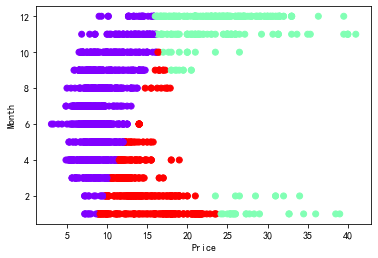

In [13]:
X = steel[['price_steel','Month']]

km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)

labels = km.labels_
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Price')
plt.ylabel('Month')

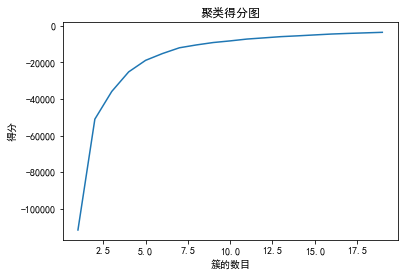

In [14]:
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(X ) for i in n_cluster]
scores = [kmeans[i].score(X ) for i in range(len(kmeans))]

plt.plot(n_cluster, scores)
plt.xlabel('簇的数目')
plt.ylabel('得分')
plt.title('聚类得分图')
plt.show()

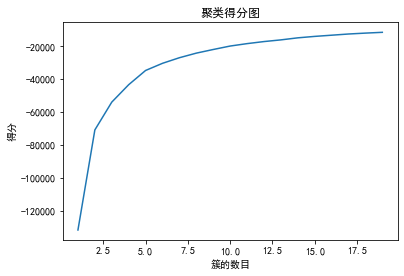

In [15]:
data = steel[['price_steel','Month','Year']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

plt.plot(n_cluster, scores)
plt.xlabel('簇的数目')
plt.ylabel('得分')
plt.title('聚类得分图')
plt.show();

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope

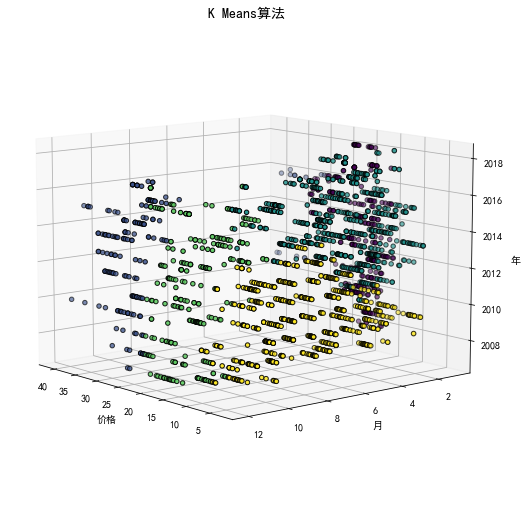

In [17]:
X = steel[['price_steel','Month','Year','Week']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=5)
km.fit(X)
km.predict(X)
labels = km.labels_


#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=10, azim=140)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("价格")
ax.set_ylabel("月")
ax.set_zlabel("年")
plt.title("K Means算法", fontsize=14)

# 主成分分析

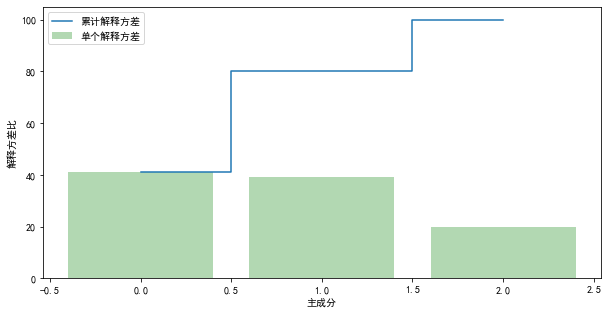

In [18]:
data = steel[['price_steel','Month','Year']]
X = data.values
X_std = StandardScaler().fit_transform(X)

mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) 

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='单个解释方差', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='累计解释方差')
plt.ylabel('解释方差比')
plt.xlabel('主成分')
plt.legend(loc='best')
plt.show()

In [19]:
data = pd.DataFrame(X_std)
#减少到只有两个变量
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [20]:
# 标准化
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

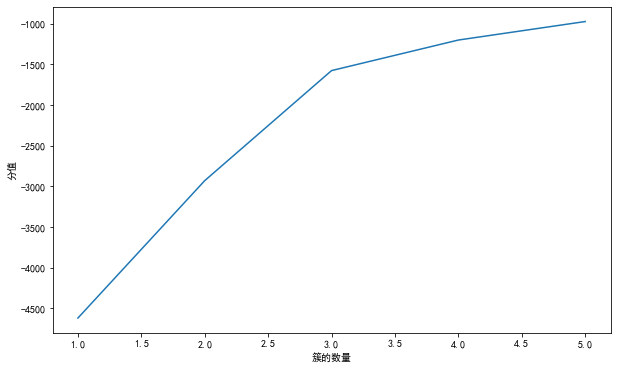

In [21]:
#计算不同n的损失图（肘部法）
n_cluster = range(1, 6)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('簇的数量')
plt.ylabel('分值')
plt.show()

In [22]:
data.index = steel.index
temp = steel
temp['cluster'] = kmeans[2].predict(data)
temp['principal_feature1'] = data[0]
temp['principal_feature2'] = data[1]
temp['cluster'].value_counts()

<ipython-input-22-9a4bcf766348>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['cluster'] = kmeans[2].predict(data)
<ipython-input-22-9a4bcf766348>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['principal_feature1'] = data[0]
<ipython-input-22-9a4bcf766348>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

0    963
2    945
1    401
Name: cluster, dtype: int64

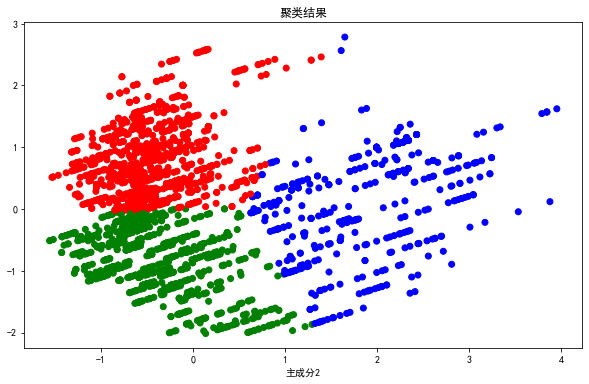

In [23]:

fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey'}
ax.scatter(temp['principal_feature1'], temp['principal_feature2'], c=temp["cluster"].apply(lambda x: colors[x]))
plt.xlabel("主成分1")
plt.xlabel("主成分2")
plt.title("聚类结果")
plt.show()

In [24]:
idata = temp[['principal_feature1','principal_feature2','cluster']]

def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in data.index:
        Xa = np.array(data[['principal_feature1','principal_feature2']].loc[i])
        Xb = model.cluster_centers_[data[['cluster']].loc[i]]
        distance.at[i]= np.linalg.norm(Xa-Xb)
    return distance
outliers_fraction = 0.01
#获取每个点与其最近的质心之间的距离。 最大距离被认为是异常 
distance = getDistanceByPoint(idata, kmeans[2])

number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()

#0 正常 1 不正常
temp['anomaly1'] = (distance >= threshold).astype(int)

<ipython-input-24-7e63d377e25a>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distance = pd.Series()
<ipython-input-24-7e63d377e25a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['anomaly1'] = (distance >= threshold).astype(int)


In [25]:
temp[temp['anomaly1']==1]

,price_steel,Year,Month,Week,cluster,principal_feature1,principal_feature2,anomaly1
date_time,,,,,,,,
2007-12-04,17.000000,2007,12,1,1,1.382590,-1.827236,1
2007-12-05,16.800000,2007,12,2,1,1.360861,-1.837544,1
2007-12-06,17.000000,2007,12,3,1,1.382590,-1.827236,1
2007-12-07,17.125000,2007,12,4,1,1.396171,-1.820794,1
2007-12-10,16.200000,2007,12,0,2,1.295673,-1.868467,1
2007-12-11,16.500000,2007,12,1,1,1.328267,-1.853006,1
2010-12-30,39.500000,2010,12,3,1,3.881050,0.118419,1
2015-11-16,40.000000,2015,11,0,1,3.847340,1.569940,1
2015-11-17,41.000000,2015,11,1,1,3.955987,1.621479,1


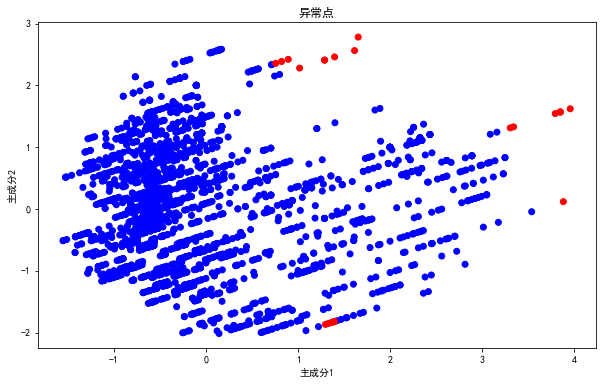

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(steel['principal_feature1'], steel['principal_feature2'], c=steel["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.title("异常点")
plt.show()

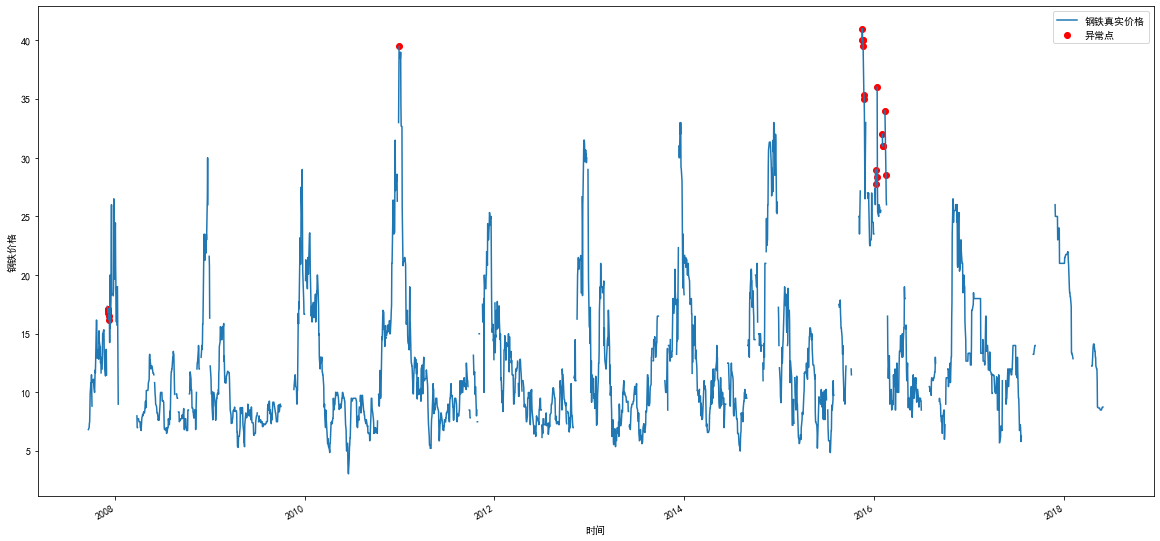

In [27]:
steel_temp = temp
plt.figure(figsize=(20,10))
steel_DF = pd.DataFrame(steel_temp, index = steel_temp.index, columns=['price_steel'])
ax = ttttttemp['price_steel'].plot(label = "钢铁真实价格")

steel_temp_anomaly = steel_temp[steel_temp['anomaly1']==1]
ax.scatter(steel_temp_anomaly.index, steel_temp_anomaly['price_steel'], color='red', label='异常点')

ax.set_xlabel('时间')
ax.set_ylabel('钢铁价格')
plt.legend()
plt.show()

# arima

In [28]:
abnor = steel_temp[steel_temp["anomaly1"] == 1]

In [29]:
len(abnor)

23

In [30]:
abnor

,price_steel,Year,Month,Week,cluster,principal_feature1,principal_feature2,anomaly1
date_time,,,,,,,,
2007-12-04,17.000000,2007,12,1,1,1.382590,-1.827236,1
2007-12-05,16.800000,2007,12,2,1,1.360861,-1.837544,1
2007-12-06,17.000000,2007,12,3,1,1.382590,-1.827236,1
2007-12-07,17.125000,2007,12,4,1,1.396171,-1.820794,1
2007-12-10,16.200000,2007,12,0,2,1.295673,-1.868467,1
2007-12-11,16.500000,2007,12,1,1,1.328267,-1.853006,1
2010-12-30,39.500000,2010,12,3,1,3.881050,0.118419,1
2015-11-16,40.000000,2015,11,0,1,3.847340,1.569940,1
2015-11-17,41.000000,2015,11,1,1,3.955987,1.621479,1


In [31]:
steel = Idata[['date_time','price_steel']]
steel['date_time'] = pd.to_datetime(steel['date_time']) 

<ipython-input-31-ca4d92a7e72c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steel['date_time'] = pd.to_datetime(steel['date_time'])


In [32]:
steel['Year'] = [steel["date_time"][i].year for i in range(len(steel))]
steel['Month'] = [steel["date_time"][i].month for  i in range(len(steel))]
steel['Week'] = [steel["date_time"][i].weekday() for  i in range(len(steel))]

<ipython-input-32-b6f844d7dc5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steel['Year'] = [steel["date_time"][i].year for i in range(len(steel))]
<ipython-input-32-b6f844d7dc5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steel['Month'] = [steel["date_time"][i].month for  i in range(len(steel))]
<ipython-input-32-b6f844d7dc5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [33]:
steel

,date_time,price_steel,Year,Month,Week
0,2007-01-01,NaN,2007,1,0
1,2007-01-03,NaN,2007,1,2
2,2007-01-04,NaN,2007,1,3
3,2007-01-05,NaN,2007,1,4
4,2007-01-08,NaN,2007,1,0
...,...,...,...,...,...
2940,2018-06-13,NaN,2018,6,2
2941,2018-06-14,NaN,2018,6,3
2942,2018-06-15,NaN,2018,6,4
2943,2018-06-18,NaN,2018,6,0


In [34]:
c = 0
s = [1]*len(steel)
for i in range(len(abnor)):
    for j in range(len(steel)):
        if abnor.price_steel[i] == steel.price_steel[j] and abnor.Year[i] == steel.Year[j] and abnor.Month[i]== steel.Month[j] and abnor.Week[i] == steel.Week[j]:
            c = c+1
            s[j] = 0

In [35]:
steel["正常"] = s

In [36]:
steel_normal = steel[steel["正常"] == 1]

In [37]:
len(steel_normal)

2922

# 预处理

In [38]:
total_days_steel = steel_normal['date_time'].size
count_null_days_steel = steel_normal['price_steel'].isna().sum()

In [39]:
total_days_steel

2922

In [40]:
print(count_null_days_steel)

636


In [41]:
print("钢铁缺失率: ", round(count_null_days_steel/total_days_steel,2))

钢铁缺失率:  0.22


Text(0, 0.5, 'x(t+1)')

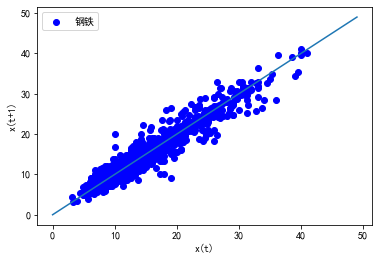

In [42]:
pd.plotting.lag_plot(steel['price_steel'],label='钢铁',c='blue')
plt.plot(range(50),range(50))
plt.legend(loc='upper left')
plt.xlabel("x(t)")
plt.ylabel("x(t+1)")

In [43]:
## 上下采样
steel_filled = steel_normal.interpolate(method='linear')

Text(0.5, 1.0, '钢铁：插值后的时序图')

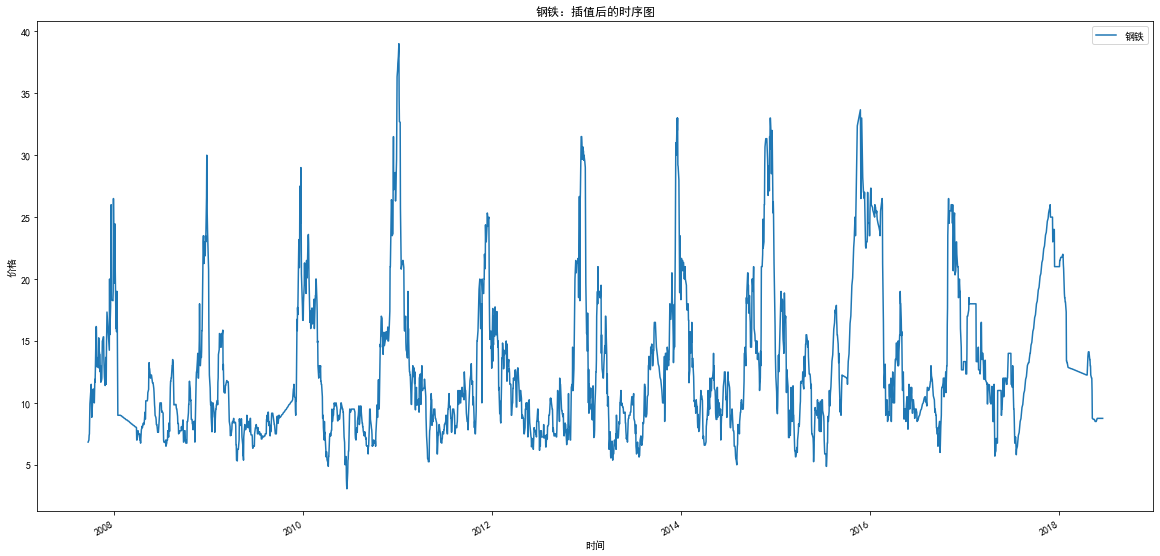

In [44]:
steel_filled.set_index('date_time')['price_steel'].plot(figsize=(20,10),label = "钢铁")

plt.legend(loc='upper right') 
plt.xlabel("时间")
plt.ylabel("价格")
plt.title("钢铁：插值后的时序图")

In [45]:
steel_filled = steel_filled.set_index('date_time')

In [46]:
steel_filled_drop = steel_filled.dropna()

In [47]:
steel_filled_drop = steel_filled.dropna()
steel_MS = steel_filled_drop['price_steel'].resample('MS').mean()#重新采样  #将每年每个月的平均


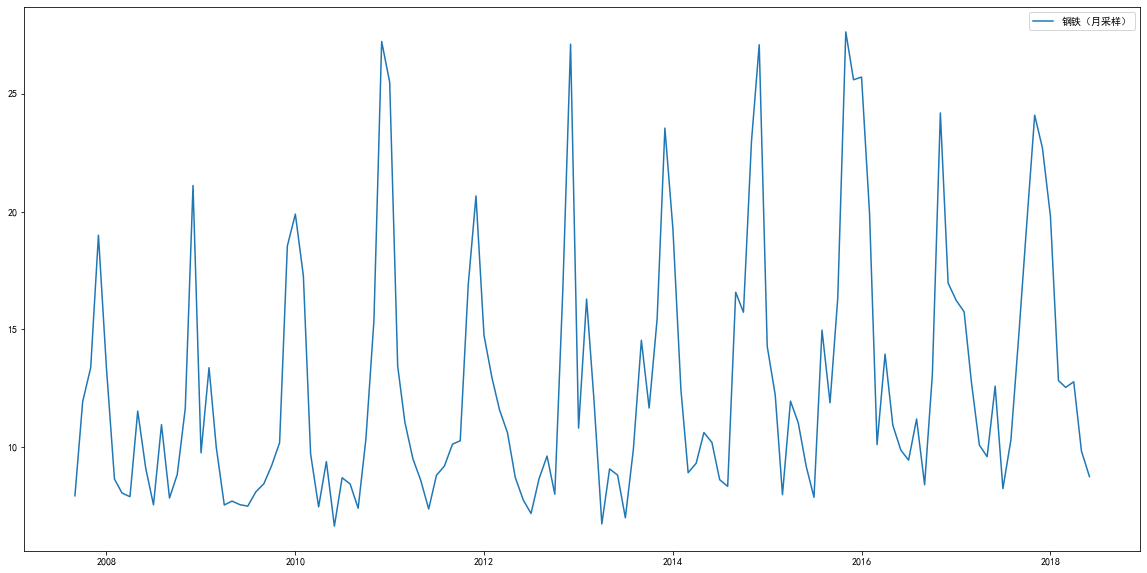

In [48]:
plt.figure(figsize=(20,10))
plt.plot(steel_MS.dropna(),label="钢铁（月采样）")
plt.legend(loc='upper right')

In [49]:
steel_MS_log = np.log(steel_MS)

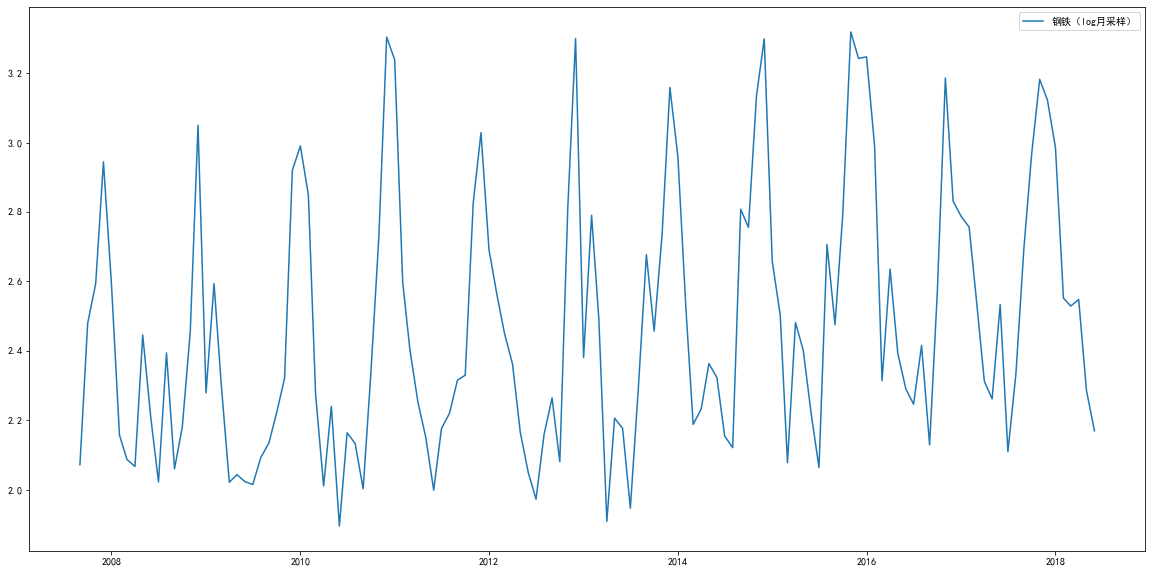

In [50]:
plt.figure(figsize=(20,10))
plt.plot(steel_MS_log.dropna(),label="钢铁（log月采样）")
plt.legend(loc='upper right')

In [51]:
steel_MS_log = steel_MS_log.to_frame()
steel_decompose=sm.tsa.seasonal_decompose(steel_MS_log['price_steel'])#时间序列趋势分解

In [52]:
def decompose(decomp, commo):
    trend = decomp.trend
    seasonal = decomp.seasonal
    residue = decomp.resid

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 10))
    axes[0].set_title(commo+" price")
    axes[0].plot(trend, color='C0')
    axes[0].set_ylabel("Trend")

    axes[1].plot(seasonal, color='C0')
    axes[1].set_ylabel("Seasonality")

    axes[2].plot(residue, color='C0')
    axes[2].set_ylabel("Residual")

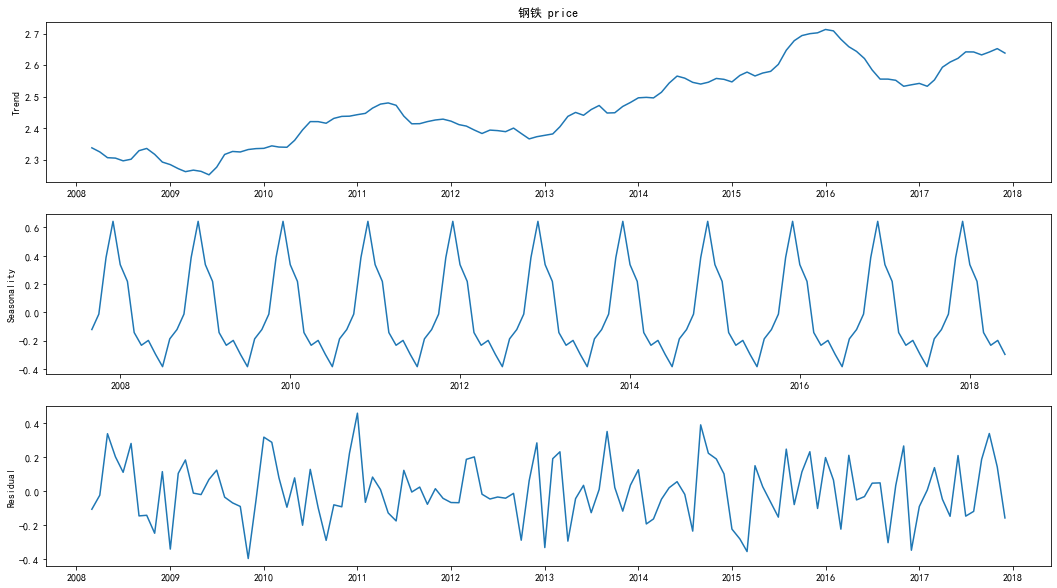

In [53]:
decompose(steel_decompose, "钢铁")

In [54]:
#adf检验
print("钢铁")
adftest = adfuller(steel_MS_log)
print(adftest)

钢铁
(-0.8362412467042921, 0.8082440473508017, 11, 118, {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}, -13.141241121427043)


In [55]:
# 差分的函数
def difference(dataset,interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return pd.Series(diff)

# 复原差分的函数
def inverse_difference(las_ob, value):
    return value + las_ob


0      0.408048
1      0.113830
2      0.350816
3     -0.352377
4     -0.434620
         ...   
124   -0.434229
125   -0.022770
126    0.018935
127   -0.261920
128   -0.116724
Length: 129, dtype: float64


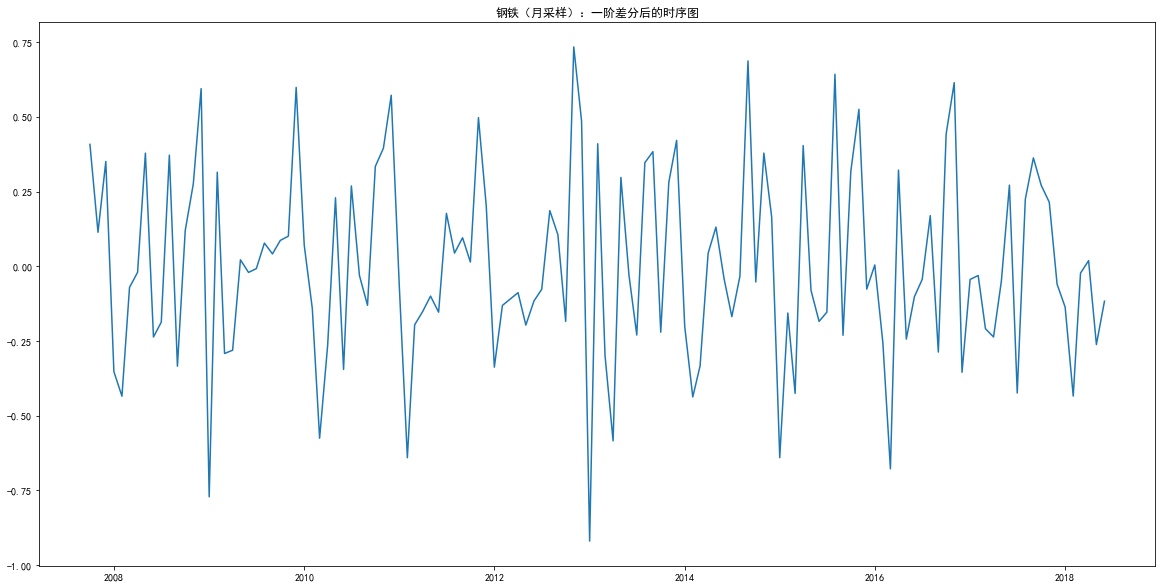

In [56]:
diff1 = difference(steel_MS_log["price_steel"],1)
plt.figure(figsize=(20,10))
plt.plot(steel_MS_log.index[1:],diff1)
plt.title("钢铁（月采样）：一阶差分后的时序图")
print(diff1)

In [57]:
#adf检验
print("钢铁")
adftest = adfuller(diff1)
print(adftest)

钢铁
(-12.115247896571713, 1.8789477013370913e-22, 10, 118, {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}, -13.888452830445203)


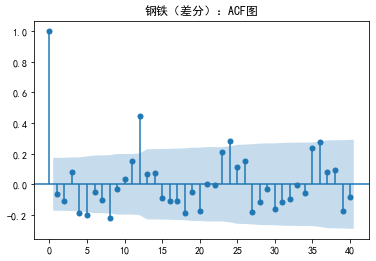

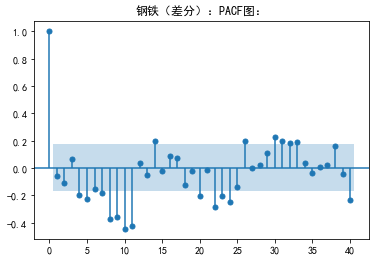

In [58]:
#自相关图
plot_acf(diff1,lags=40)
plt.title("钢铁（差分）：ACF图")
plot_pacf(diff1,lags=40)
plt.title("钢铁（差分）：PACF图：")
plt.show()

In [59]:
#test 反差分
"""
inverted = [inverse_difference(steel_MS_log[i], diff1[i]) for i in range(len(diff1))]
inverted.insert(0,steel_MS_log[0])

print(steel_MS_log)
print('*'*100)
print(diff1)
print('*'*100)
print(inverted)
print('*'*100)

print(len(steel_MS_log))
print(len(inverted))
"""

"\ninverted = [inverse_difference(steel_MS_log[i], diff1[i]) for i in range(len(diff1))]\ninverted.insert(0,steel_MS_log[0])\n\nprint(steel_MS_log)\nprint('*'*100)\nprint(diff1)\nprint('*'*100)\nprint(inverted)\nprint('*'*100)\n\nprint(len(steel_MS_log))\nprint(len(inverted))\n"

In [60]:
diff12 = difference(diff1, 12)

Text(0.5, 1.0, '一阶正规差分与一阶12步差分后的时序图')

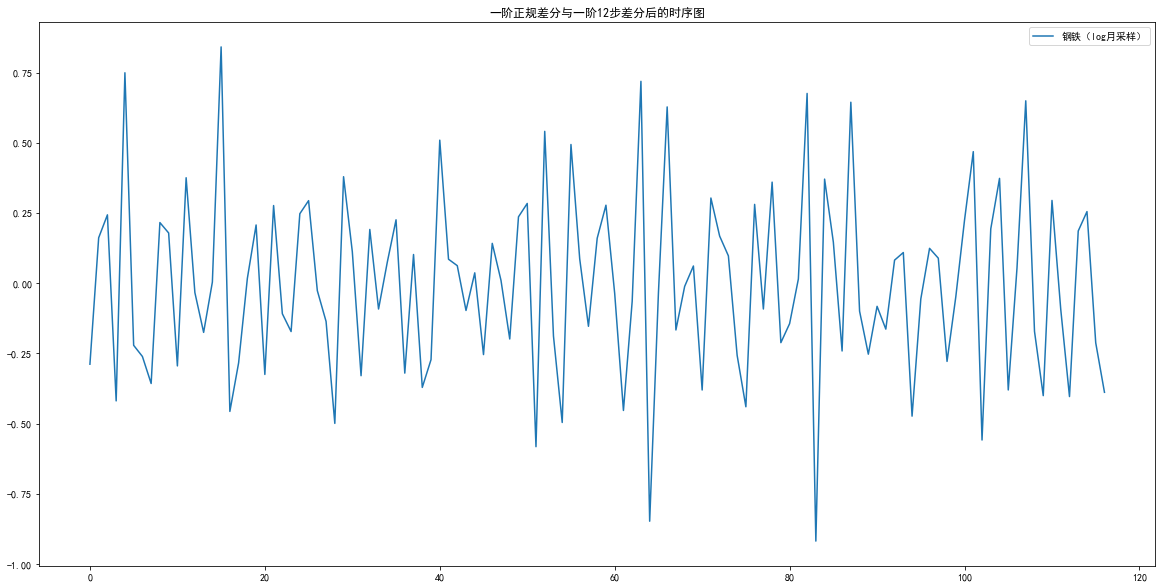

In [61]:
plt.figure(figsize=(20,10))
plt.plot(diff12.dropna(),label="钢铁（log月采样）")
plt.legend(loc='upper right')
plt.title("一阶正规差分与一阶12步差分后的时序图")

In [62]:
#12季节差分
"""
diff12 = difference(diff1, 12)
inverted = [inverse_difference(diff1[i], diff12[i]) for i in range(len(diff12))]

for i in range(12):
    inverted.insert(0,diff1[12-i])
    
print(diff1)
print('*'*100)
print(diff12)
print('*'*100)
print(inverted)
print('*'*100)

print(len(diff1))
print(len(inverted))
"""

"\ndiff12 = difference(diff1, 12)\ninverted = [inverse_difference(diff1[i], diff12[i]) for i in range(len(diff12))]\n\nfor i in range(12):\n    inverted.insert(0,diff1[12-i])\n    \nprint(diff1)\nprint('*'*100)\nprint(diff12)\nprint('*'*100)\nprint(inverted)\nprint('*'*100)\n\nprint(len(diff1))\nprint(len(inverted))\n"

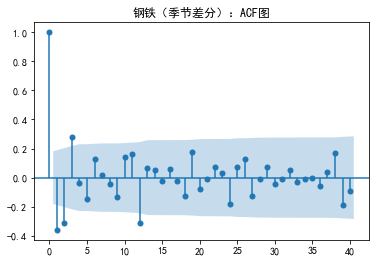

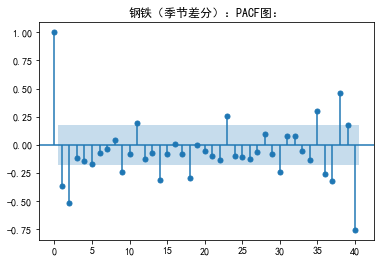

In [63]:
#自相关图
plot_acf(diff12,lags=40)
plt.title("钢铁（季节差分）：ACF图")
plot_pacf(diff12,lags=40)
plt.title("钢铁（季节差分）：PACF图：")
plt.show()

In [64]:
#白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
#test
print("钢铁")
res = acorr_ljungbox(diff12, lags=[6,12], boxpierce=True) # 数据的纯随机性检验函数
print(res)
print()
res = acorr_ljungbox(diff12, lags=[6], boxpierce=True) # 数据的纯随机性检验函数
print(res)

钢铁
(array([41.54720168, 63.22017694]), array([2.25883963e-07, 5.80526704e-09]), array([40.06305944, 59.32897927]), array([4.42700123e-07, 2.99080472e-08]))

(array([41.54720168]), array([2.25883963e-07]), array([40.06305944]), array([4.42700123e-07]))


E:\download\anaconda\download\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [65]:
import pmdarima as pm
def auto_arima_func(idata):
    arima = pm.auto_arima(idata[:'2017'], start_p=0, start_q=0, d=0, max_p=4, max_q=4, suppress_warnings=True,
                      stepwise=True, error_action='ignore', m=12)
    return arima

In [66]:
# steel_filled_drop[:'2017']
# steel_MS[:'2017']
steel_arima = auto_arima_func(steel_MS_log)

In [67]:
steel_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  124
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                   6.681
Date:                            Tue, 15 Jun 2021   AIC                             -3.362
Time:                                    21:02:31   BIC                             10.740
Sample:                                         0   HQIC                             2.367
                                            - 124                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2153      0.134      1.602      0.109      -0.048       0.479
ma.L1          0.3477      0.086      4.056      0.000       0.180       0.516
ar.S.L12       0.9126      0.055     16.658      0.000       0.805       1.020
ma.S.L12      -0.5083      0.111     -4.577      0.000      -0.726      -0.291
sigma2         0.0483      0.007      6.834      0.000       0.034       0.062
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.67   Prob(JB):                         0.28
Heteroskedasticity (H):               1.17   Skew:                             0.25
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

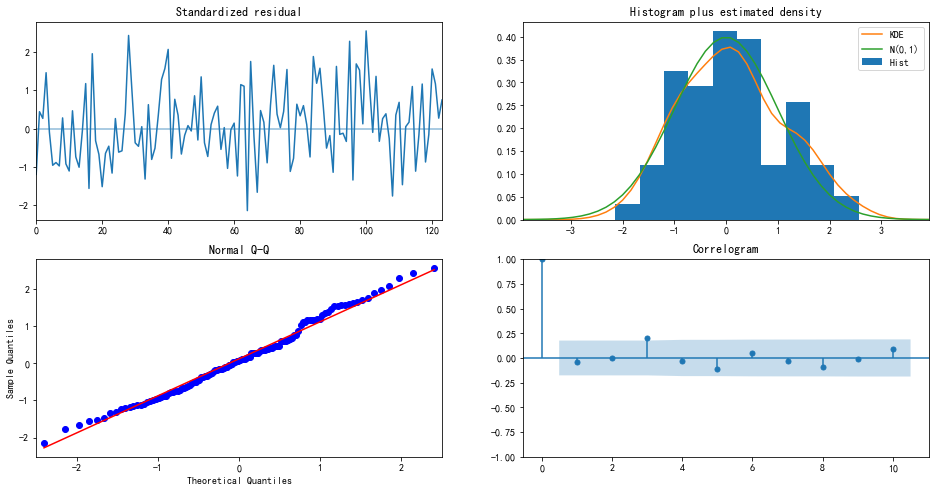

In [68]:
steel_arima.plot_diagnostics(figsize=(16, 8))
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


pred, conf_int = steel_arima.predict(n_periods=6, return_conf_int=True)
print("MSE: ", np.sqrt(mean_squared_error(steel_MS['2018':], pred)))

MSE:  10.767991492497888


In [70]:
pred, conf_int = steel_arima.predict(n_periods=6, return_conf_int=True)
print("MAE: ", np.sqrt(mean_absolute_error(steel_MS['2018':], pred)))

MAE:  3.1987269073383002


In [71]:
steel_MS['2018':].describe()

count     6.000000
mean     12.754554
std       3.854434
min       8.750000
25%      10.509498
50%      12.657826
75%      12.814481
max      19.801587
Name: price_steel, dtype: float64

In [72]:
pred_TRUE = np.exp(pred)

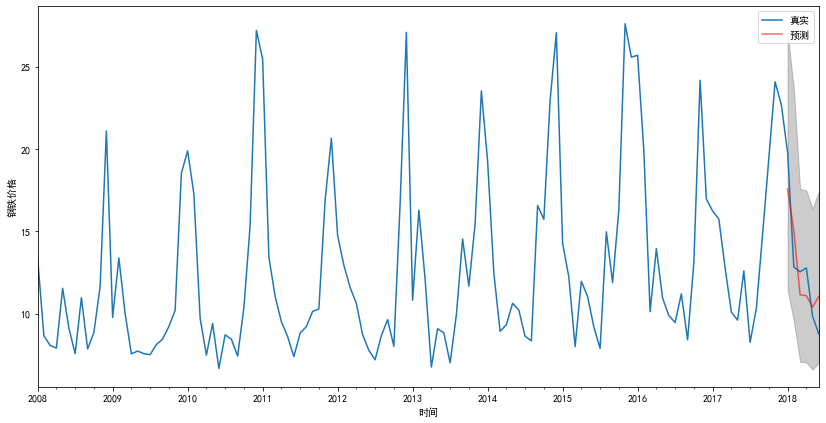

In [73]:
pred_DF = pd.DataFrame(pred_TRUE, index = steel_MS['2018':].index, columns=['预测'])
ax = steel_MS['2008':].plot(label='真实')

pred_DF.plot(ax=ax, label='One-step ahead Forecast', alpha=.6, figsize=(14, 7), color='r')
ax.fill_between(pred_DF.index,
                np.exp(conf_int[:, 0]),
                np.exp(conf_int[:, 1]), color='k', alpha=.2)
ax.set_xlabel('时间')
ax.set_ylabel("钢铁价格")
plt.legend()
plt.show()

In [82]:
steel_MS['2018':]

date_time
2018-01-01    19.801587
2018-02-01    12.826754
2018-03-01    12.537990
2018-04-01    12.777661
2018-05-01     9.833333
2018-06-01     8.750000
Freq: MS, Name: price_steel, dtype: float64

In [86]:
e = steel_MS['2018':] - pred_TRUE

In [87]:
e

date_time
2018-01-01    2.208627
2018-02-01   -2.199713
2018-03-01    1.400982
2018-04-01    1.689721
2018-05-01   -0.549950
2018-06-01   -2.301459
Freq: MS, Name: price_steel, dtype: float64

In [91]:
np.abs(np.mean(e/steel_MS['2018':]))

0.022488016665674144